## Intro to Pytorch

Pytorch furnishes the tools essential for constructing and training complex models with ease. 

**The following are the key components of Pytorch:**

### 1. Tensors

A **tensor** is a general term used to describe a **array of any dimension** of numbers. Tensors generalize the concepts of **scalars**, **vectors**, and **matrices** to any number of dimensions.

**Examples:**<br><br>
**Images**: A color image can be represented as a 3D tensor of dimensions (Height, Width, Channels). For a 128x128 color image, the tensor shape might be (128, 128, 3), where 3 represents the RGB color channels.<br><br>
**Video**: A video can be represented as a 4D tensor with dimensions (Frames, Height, Width, Channels). For a video of 30 frames, each frame being 128x128 pixels with 3 color channels, the shape might be (30, 128, 128, 3).


In [41]:
import torch

# Create a 3-dimensional tensor
images = torch.rand((4, 28, 28))

# Get the second image
second_image = images[1]

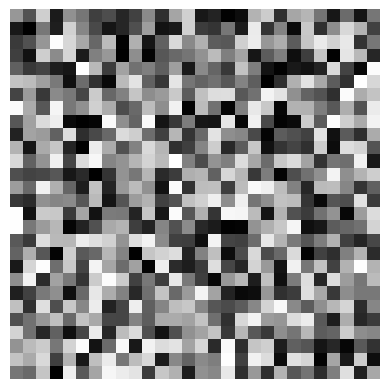

In [2]:
import matplotlib.pyplot as plt

plt.imshow(second_image, cmap='gray')
plt.axis('off') # disable axes
plt.show()

In [5]:
# Power of matrix
a = torch.tensor([[1, 1], [1, 0]])

print(a)
# print(torch.matrix_power(a, 0.4)) wrong
print(torch.matrix_power(a, 2))
print(torch.matrix_power(a, 3))
print(torch.matrix_power(a, 4))

tensor([[1, 1],
        [1, 0]])
tensor([[2, 1],
        [1, 1]])
tensor([[3, 2],
        [2, 1]])
tensor([[5, 3],
        [3, 2]])


### 2. Neural Network

Pytorch provides robust tools for the creation and manipulation of neural networks.

In [12]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.hidden_layer = nn.Linear(input_size, 64)
        self.output_layer = nn.Linear(64, 2)
        self.activation = nn.ReLU()

    def forward(self, x):
        first_pass = self.hidden_layer(x)
        second_pass = self.activation(first_pass)
        return self.output_layer(second_pass)

model = MLP(input_size=10)
model

MLP(
  (hidden_layer): Linear(in_features=10, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=2, bias=True)
  (activation): ReLU()
)

In [13]:
model.forward(torch.rand(10))

tensor([ 0.4308, -0.1105], grad_fn=<ViewBackward0>)

### 3. Loss Functions

Loss functions play a pivotal role in guiding model optimization. These functions quantify the discrepancy between the predicted output and the actual target values. By minimizing this quantified error, a model can be trained to produce more accurate results. 

**Commonly used loss functions** :
- Cross-entropy loss function (classification tasks)
- Mean-Squared error (regression tasks)

In [14]:
loss_function = nn.CrossEntropyLoss()
target_tensor = torch.tensor([1])
target_tensor

tensor([1])

In [15]:
predicted_tensor = torch.tensor([[2.0, 5.0]])
loss_value = loss_function(predicted_tensor, target_tensor)
loss_value

tensor(0.0486)

In [16]:
predicted_tensor = torch.tensor([[1.5, 1.1]])
loss_value = loss_function(predicted_tensor, target_tensor)
loss_value

tensor(0.9130)

In [17]:
loss_function = nn.MSELoss()
predicted_tensor = torch.tensor([320000.0])
actual_tensor = torch.tensor([300000.0])
loss_value = loss_function(predicted_tensor, actual_tensor)
print(loss_value.item()) 

400000000.0


### 4. Optimizers

Optimizer's primary function is to adjust the parameters of the model in response to the computed gradients aiming to minimize the loss function. 

**Well known optimizers**:
- Stochastic Gradient Descent
- Adam

In [19]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.01)

### 5. Datasets and Data loaders

The handling and preparation of data for training and evaluation is facilitated through two primary constructs, the dataset class and the data loader utility. 

The dataset class serves as blueprint for defining how data is accessed and transformed. It can do the heavy lifing of accessing and parsing directories and files. 

The dataloader utility wraps around the dataset object to provide batched, shuffled and parallized loading of data. It offers a streamlined interface for iterating over data batches during model training and evaluation. 

PyTorch Dataset class: This is like a recipe that tells your computer how to get the data it needs to learn from, including where to find it and how to parse it, if necessary.

PyTorch Data Loader: Think of this as a delivery truck that brings the data to your AI in small, manageable loads called batches; this makes it easier for the AI to process and learn from the data.

Batches: Batches are small, evenly divided parts of data that the AI looks at and learns from each step of the way

In [24]:
from torch.utils.data import Dataset

class NumberProductDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))

    def __getitem__(self, index):
        number1 = self.numbers[index]
        number2 = self.numbers[index] + 1
        return (number1, number2), number1 * number2

    def __len__(self):
        return len(self.numbers)

dataset = NumberProductDataset(
    data_range=(0, 11)
)

data_sample = dataset[3]
print(data_sample)

((3, 4), 12)


In [26]:
from torch.utils.data import DataLoader

# Instantiate the dataset
dataset = NumberProductDataset(data_range=(0, 5))

# Create a DataLoader instance
dataloader = DataLoader(dataset, batch_size=3)

# Iterating over batches
for (num_pairs, products) in dataloader:
    print(num_pairs, products)

[tensor([0, 1, 2]), tensor([1, 2, 3])] tensor([0, 2, 6])
[tensor([3, 4]), tensor([4, 5])] tensor([12, 20])


### 6. Training Loop

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class NumberSumDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))

    def __getitem__(self, index):
        number1 = float(self.numbers[index // len(self.numbers)])
        number2 = float(self.numbers[index % len(self.numbers)])
        return torch.tensor([number1, number2]), torch.tensor([number1 + number2])

    def __len__(self):
        return len(self.numbers) ** 2
    

In [34]:
dataset = NumberSumDataset(data_range=(1, 100))

for i in range(5):
    print(dataset[i])

(tensor([1., 1.]), tensor([2.]))
(tensor([1., 2.]), tensor([3.]))
(tensor([1., 3.]), tensor([4.]))
(tensor([1., 4.]), tensor([5.]))
(tensor([1., 5.]), tensor([6.]))


In [35]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, 128)
        self.output_layer = nn.Linear(128, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)

In [36]:
dataset = NumberSumDataset(data_range=(0, 100))
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)
model = MLP(input_size=2)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [37]:
for epoch in range(10):
    total_loss = 0.0
    for number_pairs, sums in dataloader:  # Iterate over the batches
        predictions = model(number_pairs)  # Compute the model output
        loss = loss_function(predictions, sums)  # Compute the loss
        loss.backward()  # Perform backpropagation
        optimizer.step()  # Update the parameters
        optimizer.zero_grad()  # Zero the gradients

        total_loss += loss.item()  # Add the loss for all batches

    print("Epoch {}: Sum of Batch Losses = {:.5f}".format(epoch, total_loss))


Epoch 0: Sum of Batch Losses = 74332.43520
Epoch 1: Sum of Batch Losses = 611.91237
Epoch 2: Sum of Batch Losses = 119.86382
Epoch 3: Sum of Batch Losses = 7.68462
Epoch 4: Sum of Batch Losses = 4.53653
Epoch 5: Sum of Batch Losses = 3.35680
Epoch 6: Sum of Batch Losses = 2.72369
Epoch 7: Sum of Batch Losses = 2.40381
Epoch 8: Sum of Batch Losses = 2.18668
Epoch 9: Sum of Batch Losses = 1.99949


In [40]:
# predicting the data
model(torch.tensor([3.0, 7.0]))

tensor([10.1315], grad_fn=<ViewBackward0>)